# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


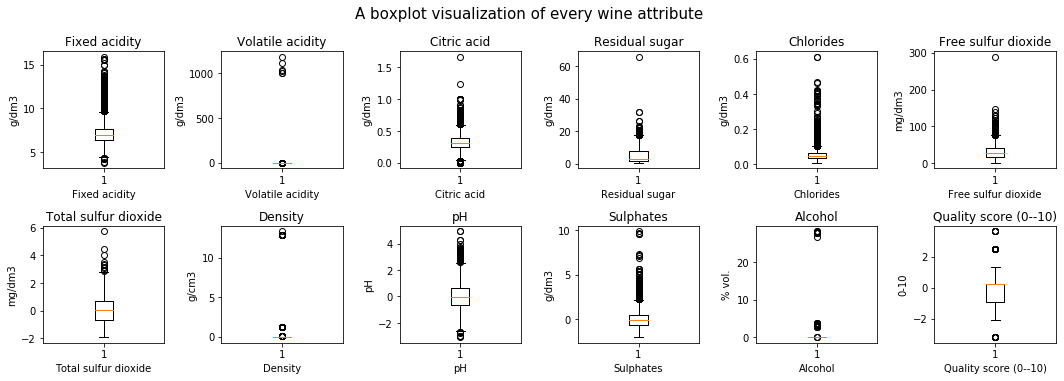

In this figure the distribution of the test results per attribute in wine is visualized in a boxplot.


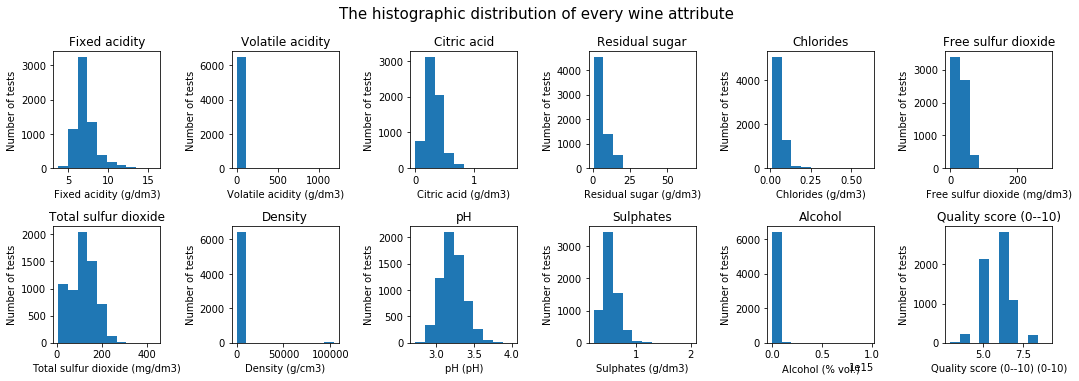

In this figure the distribution of the test results per attribute in wine is visualized in a histogram.


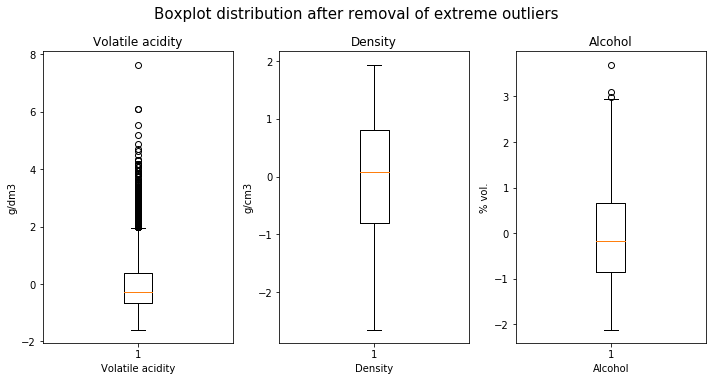

In this figure the distributions of the test results of the attributes volatile acidity, density and alcohol percentage in wine are visualized in a boxplot after removing extreme outliers (which are the test results that were more than 10 times the maximum of what we would expect).


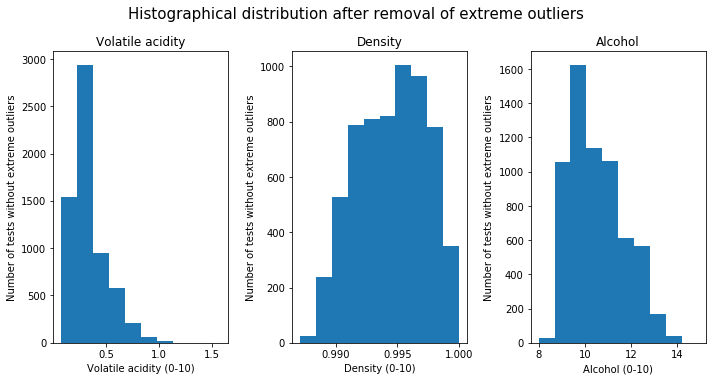

In this figure the distributions of the test results of the attributes volatile acidity, density and alcohol percentage in wine are visualized in a histogram after removing extreme outliers (which are the test results that were more than 10 times the maximum of what we would expect).


In [5]:
import numpy as np
import scipy.io as sc
import scipy.stats as st
import matplotlib.pyplot as plt

dict = sc.loadmat("Data/wine.mat")
matrix = dict.get("X")
att = dict.get("attributeNames")
unit = ["g/dm3", "g/dm3", "g/dm3", "g/dm3", "g/dm3", "mg/dm3", "mg/dm3", "g/cm3", "pH", "g/dm3", "% vol.", "0-10"]
matrixT = matrix.transpose()

# Plot boxplot of every attribute
fig, axs = plt.subplots(2, 6, figsize=[15.0, 5.0])
for i in range(0, 6):
    axs[0,i].boxplot(matrixT[i])
    axs[0,i].set_title(att[0][i][0])
    axs[0,i].set_xlabel(att[0][i][0])
    axs[0,i].set_ylabel(unit[i])
for i in range(6, 12):
    axs[1,i-6].boxplot(st.zscore(matrixT[i]))   
    axs[1,i-6].set_title(att[0][i][0])
    axs[1,i-6].set_xlabel(att[0][i][0])
    axs[1,i-6].set_ylabel(unit[i])
fig.suptitle("A boxplot visualization of every wine attribute", fontsize = 15, y=1.05)
plt.tight_layout()
plt.show()
print("In this figure the distribution of the test results per attribute in wine is visualized in a boxplot.")

# Plot histogram of every attribute
fig, axs = plt.subplots(2, 6, figsize=[15.0, 5.0])
for i in range(0,6):
    axs[0,i].hist(matrixT[i])
    axs[0,i].set_title(att[0][i][0])
    axs[0,i].set_xlabel(att[0][i][0] + " (%s)" %unit[i])
    axs[0,i].set_ylabel("Number of tests")
for i in range(6,12):
    axs[1,i-6].hist(matrixT[i])
    axs[1,i-6].set_title(att[0][i][0])
    axs[1,i-6].set_xlabel(att[0][i][0] + " (%s)" %unit[i])
    axs[1,i-6].set_ylabel("Number of tests")
fig.suptitle("The histographic distribution of every wine attribute", fontsize = 15, y=1.05)
plt.tight_layout()
plt.show()
print("In this figure the distribution of the test results per attribute in wine is visualized in a histogram.")

# Identify and remove outliers volatile acidity
matrixN = []
b = []
n=0
for x in matrixT[1]:
    if x>=(2*10):
        b.append(False)
    else:
        b.append(True)
    n=n+1

b = np.asarray(b)

for i in range(0, 12):
    matrixN.append((matrixT[i][b]))
matrixN = np.asarray(matrixN)

# Identify and remove outliers density
matrixR = []
b = []
n=0
for x in matrixN[7]:
    if x>=(1*10):
        b.append(False)
    else:
        b.append(True)
    n=n+1

b = np.asarray(b)

for i in range(0, 12):
    matrixR.append((matrixN[i][b]))
matrixR = np.asarray(matrixR)

# Identify and remove outliers alcohol percentage
matrixS = []
b = []
for x in matrixR[10]:
    if x>=(20*10):
        b.append(False)
    else:
        b.append(True)

b = np.asarray(b)

for i in range(0, 12):
    matrixS.append((matrixR[i][b]))
matrixS = np.asarray(matrixS)
    
# Plot boxplot of these three attributes
fig, axs = plt.subplots(1, 3, figsize=[10.0, 5.0])

axs[0].boxplot(st.zscore(matrixS[1]))
axs[0].set_title(att[0][1][0])
axs[0].set_xlabel(att[0][1][0])
axs[0].set_ylabel(unit[1])

axs[1].boxplot(st.stats.zscore(matrixS[7]))
axs[1].set_title(att[0][7][0])
axs[1].set_xlabel(att[0][7][0])
axs[1].set_ylabel(unit[7])

axs[2].boxplot(st.stats.zscore(matrixS[10]))
axs[2].set_title(att[0][10][0])
axs[2].set_xlabel(att[0][10][0])
axs[2].set_ylabel(unit[10])

fig.suptitle("Boxplot distribution after removal of extreme outliers", fontsize = 15, y=1.05)
plt.tight_layout()
plt.show()
print("In this figure the distributions of the test results of the attributes volatile acidity, density and alcohol percentage in wine are visualized in a boxplot after removing extreme outliers (which are the test results that were more than 10 times the maximum of what we would expect).")

# Plot histogram of these attributes
fig, axs = plt.subplots(1, 3, figsize=[10.0, 5.0])

axs[0].hist(matrixS[1])
axs[0].set_title(att[0][1][0])
axs[0].set_xlabel(att[0][1][0] + " (%s)" %unit[i])

axs[1].hist(matrixS[7])
axs[1].set_title(att[0][7][0])
axs[1].set_xlabel(att[0][7][0] + " (%s)" %unit[i])

axs[2].hist(matrixS[10])
axs[2].set_title(att[0][10][0])
axs[2].set_xlabel(att[0][10][0] + " (%s)" %unit[i])

for i in range(0,3):
    axs[i].set_ylabel("Number of tests without extreme outliers")

fig.suptitle("Histographical distribution after removal of extreme outliers", fontsize = 15, y=1.05)
plt.tight_layout()
plt.show()
print("In this figure the distributions of the test results of the attributes volatile acidity, density and alcohol percentage in wine are visualized in a histogram after removing extreme outliers (which are the test results that were more than 10 times the maximum of what we would expect).")

----
Because the outliers are now removed we can visualize the data better since the computer doesn't take into account the outliers when visualizing anymore. For example, the second boxplot is larger and more detailed than the first since it thus doesn't need to visualize these outliers anymore.

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----
(We could skip this one but just to try)
Because otherwise the standardization of the data would still be influenced by the outliers which are now removed. Therefore we first need to remove the outliers and then standardize.

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

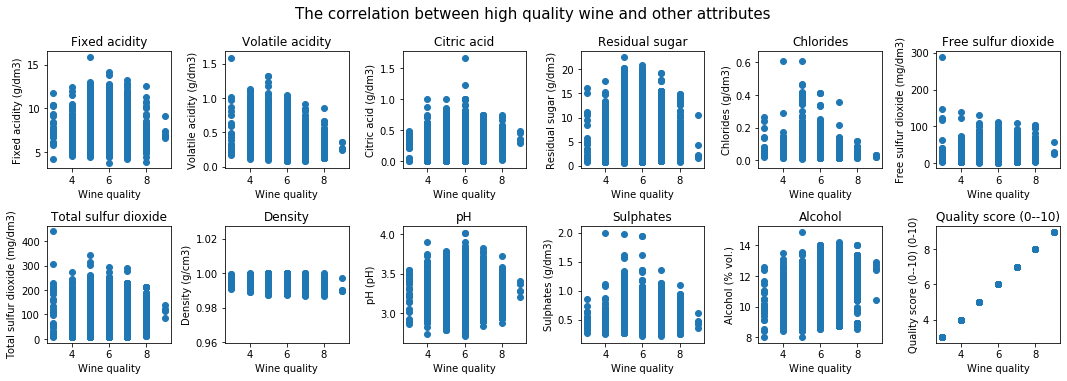

In this figure the correlation between high quality wine and each of the other attributes in wine tested, is visualized.

Correlations:
The correlation of attribute 1 : Fixed acidity with high quality wine is:  -0.07668526520453652
The correlation of attribute 2 : Volatile acidity with high quality wine is:  -0.26230590578350776
The correlation of attribute 3 : Citric acid with high quality wine is:  0.0890221181546118
The correlation of attribute 4 : Residual sugar with high quality wine is:  -0.03215392730963386
The correlation of attribute 5 : Chlorides with high quality wine is:  -0.19914164479762572
The correlation of attribute 6 : Free sulfur dioxide with high quality wine is:  0.05516006485585848
The correlation of attribute 7 : Total sulfur dioxide with high quality wine is:  -0.03971034037910721
The correlation of attribute 8 : Density with high quality wine is:  -0.3196176972872714
The correlation of attribute 9 : pH with high quality wine is:  0.02030807915814118
The correla

In [9]:
q = matrixS[11]

fig, axs = plt.subplots(2, 6, figsize=[15.0, 5.0])
for i in range(0, 6):
    axs[0,i].scatter(q, matrixS[i])
    axs[0,i].set_title(att[0][i][0])
    axs[0,i].set_xlabel("Wine quality")
    axs[0,i].set_ylabel(att[0][i][0] + " (%s)" %unit[i])
for i in range(6, 12):
    axs[1,i-6].scatter(q, matrixS[i])
    axs[1,i-6].set_title(att[0][i][0])
    axs[1,i-6].set_xlabel("Wine quality")
    axs[1,i-6].set_ylabel(att[0][i][0] + " (%s)" %unit[i])
plt.suptitle("The correlation between high quality wine and other attributes", fontsize=15, y=1.05)
plt.tight_layout()
plt.show()
print("In this figure the correlation between high quality wine and each of the other attributes in wine tested, is visualized.")
print()

print("Correlations:")
cor = []
for i in range(0, 11):
    cor.append(st.pearsonr(q, matrixS[i]))

for i in range(0, 11):
    print("The correlation of attribute", i+1,":", att[0][i][0] ,"with high quality wine is: ", cor[i][0])

----
Determining a clear relationship from the figures (manually) is difficult because of the many data points, but some remarks can be made from calculating the correlation coefficient. For example, the correlation between alcohol and wine quality (0.4495) and density and wine quality (-0.3196) are relatively high. This would imply that if the wine quality is rated high, the alcohol level is also higher but the density is lower. There is apparently a very low correlation between pH and wine quality (0.020) which would mean that the pH does not have a large influence on the rating of the wine quality.

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


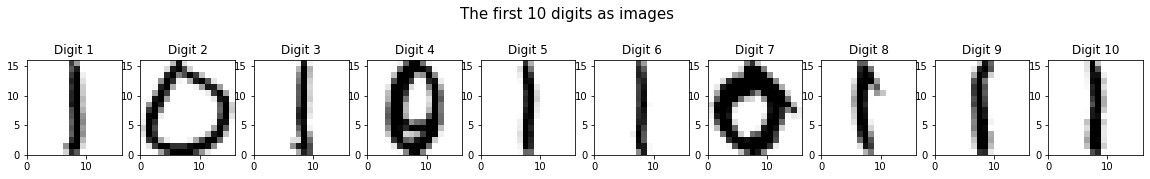

In this figure the first 10 images of the trainingdata are printed.


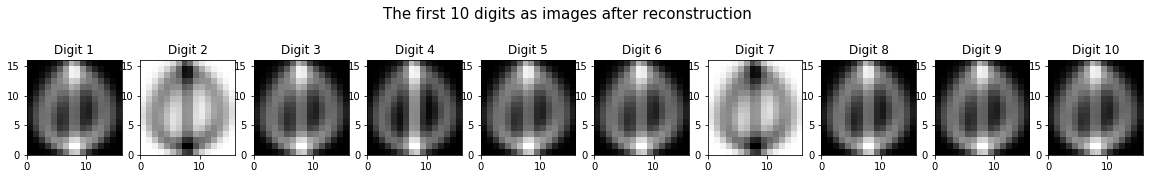

In this figure the first 10 images of the trainingdata after applying PCA and reconstructing them are printed.


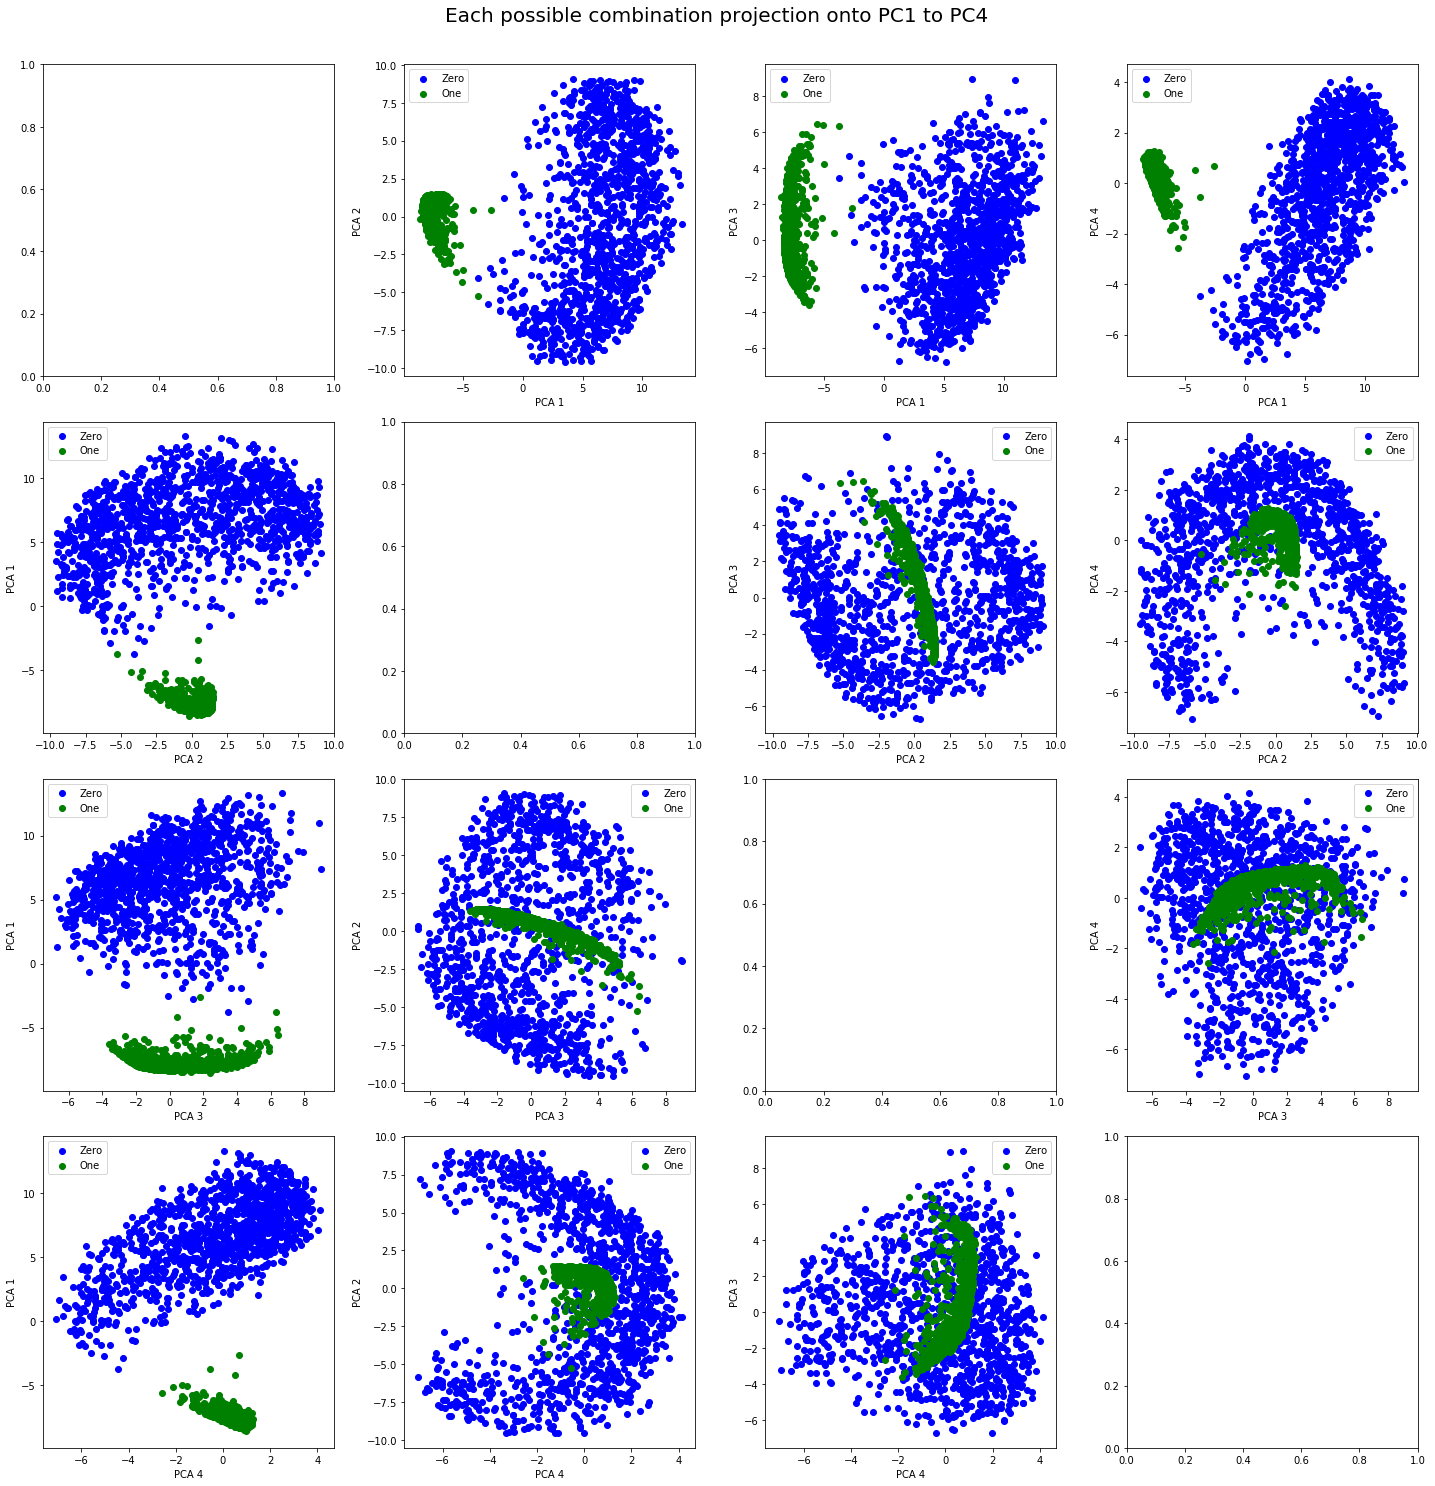

In this figure every principal component is plotted in a scatter plotted against every other principal component as to visualize each possible combination projection onto PC1 to PC4.


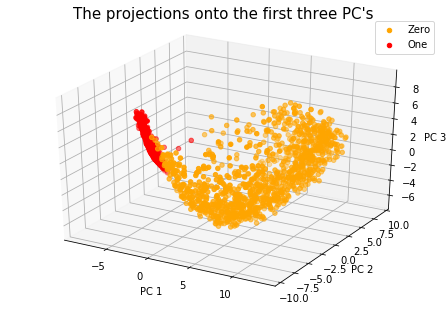

In this figure a 3-dimensional scatterplot of the projections onto the first three principal components is visualized.


In [10]:
## Example code:
#------------------------------------------------
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#from scipy.io import loadmat
#from numpy import reshape

# Index of the digit to display
#i = 0

# Load Matlab data file to python dict structure
#mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
#testdata = mat_data['testdata']
#traindata = mat_data['traindata']
#X = traindata[:,1:]
#y = traindata[:,0]

# Visualize the i'th digit as an image
#plt.subplot(1,1,1);
#I = reshape(X[i,:],(16,16))
#plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
#plt.title('Digit as an image');
#plt.show()
#------------------------------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from numpy import reshape

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
b = traindata[:,0]<2
traindata = traindata[:][b]
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the first 10 images
fig, axs = plt.subplots(1, 10, figsize=[20.0, 2.0])
for i in range(0, 10):
    I = reshape(X[i,:],(16,16))
    axs[i].set_title(('Digit %s' %str(i+1)));
    axs[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.suptitle("The first 10 digits as images", fontsize=15, y=1.2)
plt.show()
print("In this figure the first 10 images of the trainingdata are printed.")

# PCA
μ = X.mean(axis=0)
Y = X - μ
U,sv,Vt = np.linalg.svd(Y)
V = Vt.transpose()

# Project X onto the space spanned by the loadings V
Z = np.dot(Y, V[:,:4])

# Recostruct data from projection
W = np.dot(Z, np.transpose(V[:,:4]) + μ)

# Print first 10 reconstructed digits
fig, axs = plt.subplots(1, 10, figsize=[20.0, 2.0])
for i in range(0, 10):
    I = reshape(W[i,:],(16,16))
    axs[i].set_title(('Digit %s' % str(i+1)));
    axs[i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.suptitle("The first 10 digits as images after reconstruction", fontsize=15, y=1.2)
plt.show()
print("In this figure the first 10 images of the trainingdata after applying PCA and reconstructing them are printed.")

# Four by four subplot of each possible combination projection onto PC1 to PC4
fig, axs = plt.subplots(4, 4, figsize=[20.0, 20.0])
y0 = []
y1 = []
for x in y:
    if x==0:
        y0.append(True)
        y1.append(False)
    else:
        y0.append(False)
        y1.append(True)
y0 = np.asarray(y0)
y1 = np.asarray(y1)
for i in range(0,4):
    for j in range(0,4):
        if i!=j:
            axs[i,j].scatter(Z[:,i][y0], Z[:,j][y0], color="blue", label="Zero") 
            axs[i,j].scatter(Z[:,i][y1], Z[:,j][y1], color="green", label="One") 
            axs[i,j].set_xlabel("PCA %s" %str(i+1))
            axs[i,j].set_ylabel("PCA %s" %str(j+1))
            axs[i,j].legend()
plt.tight_layout()
plt.suptitle("Each possible combination projection onto PC1 to PC4", fontsize=20, y=1.03)
plt.show()
print("In this figure every principal component is plotted in a scatter plotted against every other principal component as to visualize each possible combination projection onto PC1 to PC4.")

# 3-dimensional scatterplot of the projections onto the first three principal components
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Z[:,0][y0], Z[:,1][y0], Z[:,2][y0], color="orange", label="Zero")
ax.scatter(Z[:,0][y1], Z[:,1][y1], Z[:,2][y1], color="red", label="One")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.legend()
plt.suptitle("The projections onto the first three PC's", fontsize=15, y=1.03)
plt.show()
print("In this figure a 3-dimensional scatterplot of the projections onto the first three principal components is visualized.")

----
One thing we can conclude from these scatterplots is that the zero class data points are far more distributed than the one class data points which are more clustered. This would mean that the one class images are more identical to eachother than the zero class images are to eachother. When looking at the 10 images above this would also make sense since the zero class images are written in more versatile ways than the one class images. Another thing we can see from these graphs is that datapoints overlap except for when the first principal component is involved.

----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [11]:
import numpy as np

p = np.array([2,3,6,8,11,18])
m = np.mean(p)
s = np.std(p)
print("Mean: ", m)
print("Standard Deviation: ", s)

Mean:  8.0
Standard Deviation:  5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [12]:
import itertools as it
import numpy as np

twoAliens = list(it.combinations(p, 2))
fourAliens = list(it.combinations(p, 4))

mTwo = list()
mFour = list()

for x in twoAliens:
    mTwo.append(np.mean(x))

for x in fourAliens:
    mFour.append(np.mean(x))
    
print("Possible samples of two aliens without replacement: \n", twoAliens)
print("Mean of every sample: \n", mTwo)

print()

print("Possible samples of four aliens without replacement: \n", fourAliens)
print("Mean of every sample: \n", mFour)

Possible samples of two aliens without replacement: 
 [(2, 3), (2, 6), (2, 8), (2, 11), (2, 18), (3, 6), (3, 8), (3, 11), (3, 18), (6, 8), (6, 11), (6, 18), (8, 11), (8, 18), (11, 18)]
Mean of every sample: 
 [2.5, 4.0, 5.0, 6.5, 10.0, 4.5, 5.5, 7.0, 10.5, 7.0, 8.5, 12.0, 9.5, 13.0, 14.5]

Possible samples of four aliens without replacement: 
 [(2, 3, 6, 8), (2, 3, 6, 11), (2, 3, 6, 18), (2, 3, 8, 11), (2, 3, 8, 18), (2, 3, 11, 18), (2, 6, 8, 11), (2, 6, 8, 18), (2, 6, 11, 18), (2, 8, 11, 18), (3, 6, 8, 11), (3, 6, 8, 18), (3, 6, 11, 18), (3, 8, 11, 18), (6, 8, 11, 18)]
Mean of every sample: 
 [4.75, 5.5, 7.25, 6.0, 7.75, 8.5, 6.75, 8.5, 9.25, 9.75, 7.0, 8.75, 9.5, 10.0, 10.75]


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [13]:
mxTwo = np.mean(np.asarray(mTwo))
mxFour = np.mean(np.asarray(mFour))

sxTwo = np.std(np.asarray(mTwo))
sxFour = np.std(np.asarray(mFour))

print("N2 Samples:")
print("mx: ", mxTwo)
print("sx: ", sxTwo)
print()
print("N4 Samples:")
print("mx: ", mxFour)
print("sx: ", sxFour)

N2 Samples:
mx:  8.0
sx:  3.40587727318528

N4 Samples:
mx:  8.0
sx:  1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

----
(i) The mean of the population mean is equal to the mean of both sample means (8.0 = 8.0 = 8.0). 
(ii) N2: 5.385/√2 * √(6-2)/(6-1) = 3.406
     N4: 5.385/√4 * √(6-4)/(6-1) = 1.703 
As you can see these numbers are equal to the standard deviation of both sample means. Hence we have verified the Central Limit Theorem.

----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

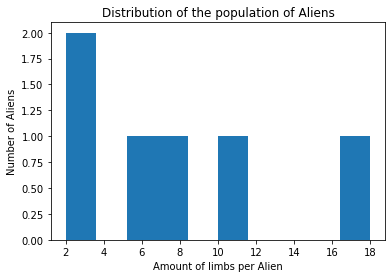

In this graph you can see the distribution of the population of aliens with a certain amount of limbs.


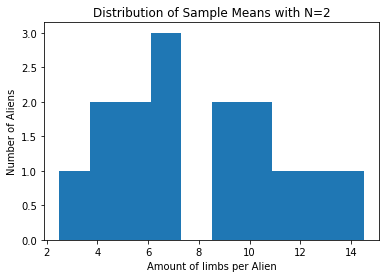

In this graph you can see the distribution of two aliens with a certain amount of limbs without replacement.



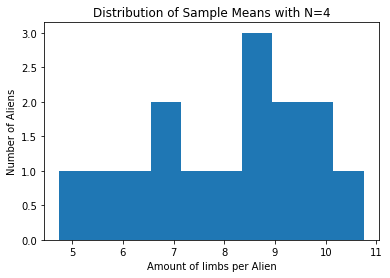

In this graph you can see the distribution of four aliens with a certain amount of limbs without replacement.



In [15]:
import matplotlib.pyplot as plt

plt.hist(p)
plt.title("Distribution of the population of Aliens", fontsize=12)
plt.xlabel("Amount of limbs per Alien")
plt.ylabel("Number of Aliens")
plt.show()
plt.close()
print("In this graph you can see the distribution of the population of aliens with a certain amount of limbs.")

plt.hist(mTwo)
plt.title("Distribution of Sample Means with N=2", fontsize=12)
plt.xlabel("Amount of limbs per Alien")
plt.ylabel("Number of Aliens")
plt.show()
plt.close()
print("In this graph you can see the distribution of two aliens with a certain amount of limbs without replacement.")
print()

plt.hist(mFour)
plt.title("Distribution of Sample Means with N=4", fontsize=12)
plt.xlabel("Amount of limbs per Alien")
plt.ylabel("Number of Aliens")
plt.show()
plt.close()
print("In this graph you can see the distribution of four aliens with a certain amount of limbs without replacement.")
print()

----
As you can see the highest point of the distibution moves to the right when the sample size (N*) increases. This would imply that with a higher sample size there are relatively more aliens with more limbs and less aliens with less limbs.

----